In [1]:
#!pip install spotipy --upgrade
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

In [3]:
import json

with open("../secrets.json", "r") as f:
    secrets = json.load(f)

<IPython.core.display.Javascript object>

In [4]:
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.oauth2 as oauth2


CLIENT_ID = secrets["spotify_client_id"]
CLIENT_SECRET = secrets["spotify_client_secret"]

credentials = oauth2.SpotifyClientCredentials(
    client_id=CLIENT_ID, client_secret=CLIENT_SECRET
)

token = credentials.get_access_token()
sp = spotipy.Spotify(auth=token)

# track = "coldplay yellow"
# res = spotify.search(track, type="track", market="US", limit=1)
# print(res)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: You're using 'as_dict = True'.get_access_token will return the token string directly in future versions. Please adjust your code accordingly, or use get_cached_token instead.
  


<IPython.core.display.Javascript object>

In [5]:
# print(json.dumps(res, indent=4, sort_keys=True))

<IPython.core.display.Javascript object>

In [6]:
# res = sp.featured_playlists()
# print(response["message"])

# while response:
#     playlists = response["playlists"]
#     for i, item in enumerate(playlists["items"]):
#         print(playlists["offset"] + i, item["name"])

#     if playlists["next"]:
#         response = sp.next(playlists)
#     else:
#         response = None

<IPython.core.display.Javascript object>

In [7]:
# print(json.dumps(res, indent=4, sort_keys=True))

<IPython.core.display.Javascript object>

Let's think about making a simple goal. How do I get my song onto running playlists?

In [8]:
# first get a list of running playlists from spotify using the search function
s_limit = 10
res = sp.search("Running", limit=s_limit, type="playlist", market="US")


<IPython.core.display.Javascript object>

``` python
playlist_info = {}
max_results = 30
offset = 0
while offset < max_results:
    playlists = res["playlists"]
    for i, item in enumerate(playlists["items"]):
        # Store the name as a key. Get the number of tracks and uri
        playlist_info[item["name"]] = [item["tracks"]["total"], item["uri"]]
    if playlists["next"]:
        res = sp.next(playlists)
        offset += s_limit
    else:
        res = None
playlist_info
```

In [9]:
# pd.DataFrame(playlist_info).T.to_csv("playlists_taken_from.csv")

<IPython.core.display.Javascript object>

In [10]:
# len(playlist_info)

<IPython.core.display.Javascript object>

In [11]:
# curr_playlist = list(playlist_info.items())[0]
# curr_playlist[1][1]

<IPython.core.display.Javascript object>

``` python
from pprint import pprint
#curr_playlist = list(playlist_info.items())[0]
all_track_ids = []

for p in list(playlist_info.items()):

    pl_id = p[1][1]
    offset = 0

    track_ids = []

    while True:
        response = sp.playlist_tracks(pl_id,
                                     offset=offset,
                                     fields='items.track.id,total',
                                     additional_types=['track'])
        #store the track ids from the playlist
        for item in response['items']:
            track_ids.append( item['track']['id'])

        offset = offset + len(response['items'])
        print(offset, "/", response['total'])

        if len(response['items']) == 0:
            break
            
    #Add the per_playlist ids to the master list
    all_track_ids.extend(track_ids)
```

In [12]:
# len(all_track_ids)

<IPython.core.display.Javascript object>

In [13]:
# all_track_ids_np = np.array(all_track_ids)

<IPython.core.display.Javascript object>

In [14]:
# all_track_ids_np = np.unique(all_track_ids_np)

<IPython.core.display.Javascript object>

In [15]:
# len(all_track_ids_np)

<IPython.core.display.Javascript object>

In [16]:
# all_track_ids_np

<IPython.core.display.Javascript object>

In [17]:
# pd.DataFrame(all_track_ids_np).to_csv("running_playlists_track_ids.csv")

<IPython.core.display.Javascript object>

In [18]:
track_ids = pd.read_csv("running_playlists_track_ids.csv")

<IPython.core.display.Javascript object>

In [19]:
response = sp.audio_features(list(track_ids["0"][:100]))

<IPython.core.display.Javascript object>

In [20]:
print(json.dumps(response, indent=4, sort_keys=True))



[
    {
        "acousticness": 0.154,
        "analysis_url": "https://api.spotify.com/v1/audio-analysis/00GOPLxW4PGQuUYdPJh8K1",
        "danceability": 0.71,
        "duration_ms": 180675,
        "energy": 0.47,
        "id": "00GOPLxW4PGQuUYdPJh8K1",
        "instrumentalness": 0,
        "key": 1,
        "liveness": 0.643,
        "loudness": -9.33,
        "mode": 0,
        "speechiness": 0.142,
        "tempo": 80.027,
        "time_signature": 4,
        "track_href": "https://api.spotify.com/v1/tracks/00GOPLxW4PGQuUYdPJh8K1",
        "type": "audio_features",
        "uri": "spotify:track:00GOPLxW4PGQuUYdPJh8K1",
        "valence": 0.581
    },
    {
        "acousticness": 0.0521,
        "analysis_url": "https://api.spotify.com/v1/audio-analysis/00QyLmjxaSEE8qIZQjBXBj",
        "danceability": 0.554,
        "duration_ms": 227893,
        "energy": 0.899,
        "id": "00QyLmjxaSEE8qIZQjBXBj",
        "instrumentalness": 0,
        "key": 8,
        "liveness": 0.0568,
 

<IPython.core.display.Javascript object>

In [21]:
df = pd.DataFrame.from_dict(response)

<IPython.core.display.Javascript object>

In [22]:
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.710,0.470,1,-9.330,0,0.1420,0.15400,0.00000,0.6430,0.581,80.027,audio_features,00GOPLxW4PGQuUYdPJh8K1,spotify:track:00GOPLxW4PGQuUYdPJh8K1,https://api.spotify.com/v1/tracks/00GOPLxW4PGQ...,https://api.spotify.com/v1/audio-analysis/00GO...,180675,4
1,0.554,0.899,8,-4.573,1,0.4080,0.05210,0.00000,0.0568,0.552,171.966,audio_features,00QyLmjxaSEE8qIZQjBXBj,spotify:track:00QyLmjxaSEE8qIZQjBXBj,https://api.spotify.com/v1/tracks/00QyLmjxaSEE...,https://api.spotify.com/v1/audio-analysis/00Qy...,227893,4
2,0.650,0.893,11,-3.340,0,0.0426,0.01300,0.00384,0.0898,0.246,115.005,audio_features,00V7a8gzdZQgvulLe3MDe3,spotify:track:00V7a8gzdZQgvulLe3MDe3,https://api.spotify.com/v1/tracks/00V7a8gzdZQg...,https://api.spotify.com/v1/audio-analysis/00V7...,259773,4
3,0.899,0.509,9,-8.040,1,0.3870,0.00157,0.00000,0.0573,0.599,150.001,audio_features,00ko9WaS4jOX1kEk3gvHjf,spotify:track:00ko9WaS4jOX1kEk3gvHjf,https://api.spotify.com/v1/tracks/00ko9WaS4jOX...,https://api.spotify.com/v1/audio-analysis/00ko...,225924,4
4,0.357,0.653,9,-5.554,1,0.0654,0.08280,0.00000,0.0844,0.522,176.647,audio_features,00qOE7OjRl0BpYiCiweZB2,spotify:track:00qOE7OjRl0BpYiCiweZB2,https://api.spotify.com/v1/tracks/00qOE7OjRl0B...,https://api.spotify.com/v1/audio-analysis/00qO...,259800,4


<IPython.core.display.Javascript object>

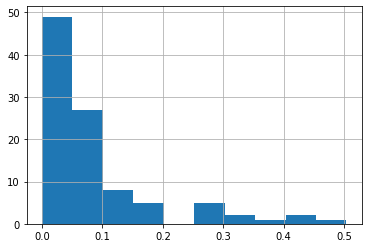

<IPython.core.display.Javascript object>

In [23]:
df["speechiness"].hist()